# Task 1

In [17]:
import pandas as pd
import numpy as np
import scipy.spatial.distance
import scipy.cluster.hierarchy as model
from scipy.spatial.distance import pdist, squareform
import os
os.chdir('C:\\Users\\adala\\Downloads')
import re
import math

## 1 - 4

In [18]:
f = open('words.txt', 'r')
unique_words = []
for row in f:
    row = row.lower()
    row = re.split('[^a-z]', row)
    row = list(filter(None, row))
    for el in row:
        unique_words.append(el)
        
unique = list(set(unique_words))
my_dict = dict(enumerate(unique))
my_dict

{0: 'two',
 1: 'you',
 2: 'the',
 3: 'release',
 4: 'world',
 5: 'stdout',
 6: 'later',
 7: 'vermin',
 8: 'common',
 9: 'installed',
 10: 'part',
 11: 'high',
 12: 'diploid',
 13: 'now',
 14: 'download',
 15: 'over',
 16: 'second',
 17: 'such',
 18: 'type',
 19: 'stdin',
 20: 'safer',
 21: 'learned',
 22: 'processors',
 23: 'their',
 24: 'recent',
 25: 'lines',
 26: 'features',
 27: 'leopard',
 28: 'new',
 29: 'safari',
 30: 'needing',
 31: 'october',
 32: 'typically',
 33: 'lb',
 34: 'if',
 35: 'or',
 36: 'without',
 37: 'moved',
 38: 'through',
 39: 'flow',
 40: 'patch',
 41: 'separate',
 42: 'cats',
 43: 'that',
 44: 'factory',
 45: 'switch',
 46: 'versions',
 47: 'arguments',
 48: 'sounds',
 49: 'clear',
 50: 'mountain',
 51: 'every',
 52: 'domestication',
 53: 'it',
 54: 'x',
 55: 'mac',
 56: 'predecessor',
 57: 'dogs',
 58: 'using',
 59: 'one',
 60: 'need',
 61: 'read',
 62: 'according',
 63: 'year',
 64: 'frequency',
 65: 'tamed',
 66: 'kg',
 67: 'basic',
 68: 'file',
 69: 'made

## 5

In [19]:
#Open txt file again for turn it to a list
my_file = open('words.txt', 'r')
content = my_file.read()
content_list = content.split("\n")
my_file.close()

In [20]:
#Make the list by our sentences
sentences = []
for el in content_list:
    sentences.append(el)

sentences = [i for i in sentences if len(i) > 0]#remove empty sentences if there are some
len(sentences)

22

In [21]:
df = []
for i in sentences:#First we go trough our list of sentences getting elemnet by element
    df_2 = []
    for j in my_dict:
        df_2.append(re.split('[^a-z]', i.lower()).count(my_dict[j]))#and then clean a sentence and count how may unique words
    df.append(df_2)#add all of lists together                      #are there, and add a sublist to our sublist df_2

matrix_df = pd.DataFrame(df)

In [22]:
values_dic = list(my_dict.values())#get only values of our dict 
matrix_df.columns = values_dic# apply them as columns

sentences_df = pd.DataFrame(sentences) # make a sentences list as DF
sentences_df.rename(columns={0: 'Sentences'}, inplace=True)#Guve a column name to DF
bag_words = pd.concat([matrix_df, sentences_df], axis=1)#Merge Two dataFrames together 
bag_words.set_index('Sentences', inplace=True) # Set sentences as its indexes

bag_words.head()

,two,you,the,release,world,stdout,later,vermin,common,installed,...,firmware,version,no,may,installs,releases,adjacent,keyboards,similar,yosemite
Sentences,,,,,,,,,,,,,,,,,,,,,
"In comparison to dogs, cats have not undergone major changes during the domestication process.",0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"As cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A common interactive use of cat for a single file is to output the content of a file to standard output.,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
"Cats can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small animals.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"In one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.",0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
bag_words.shape

(22, 254)

## 6

In [24]:
distance_data = bag_words.to_numpy()#Turn our df to numpy array
distance = []
for i in range(len(distance_data)):
    distance.append(scipy.spatial.distance.cosine(distance_data[0], distance_data[i]))#getting data about the distance

In [25]:
dist_dict = dict(zip(sentences, distance))#apply distance and sentences to dict
ascending_dict = sorted(dist_dict.items(), key=lambda item: item[1])#sort it by cosine distance ascending order
ascending_dict = dict(ascending_dict[0:3])#Get our two closest sentences
ascending_dict

{'In comparison to dogs, cats have not undergone major changes during the domestication process.': 0,
 'Domestic cats are similar in size to the other members of the genus Felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).': 0.7327387580875756,
 'In one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.': 0.7770887149698589}

Report: As we can see the 7th and the 5th sentences are the closest to the first sentence. These senences have got similairty by sentences. If we would find euclidian distance here it woudnt work properly because cosine distance get closer as vector gets more far away from each other. 

# Task 2

## Term Freaquence matrix

In [26]:
lst_tf = np.count_nonzero(matrix_df, axis=1)#here we count all nonzero elements by rows from matrix_df
tf = matrix_df.div(pd.Series(lst_tf), axis=0)#and devide element to number of words in sentence.
tf.T.head()#Transpose a data frame

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
two,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.058824,0.0,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.000000
you,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.030303,0.0,...,0.052632,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00,0.038462,0.000000
the,0.071429,0.0,0.066667,0.0,0.0,0.058824,0.105263,0.1,0.060606,0.0,...,0.105263,0.058824,0.0,0.0,0.033333,0.0,0.043478,0.10,0.038462,0.047619
release,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.05,0.000000,0.000000
world,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.000000


## Inverse Document Frequency matrix

In [27]:
idf_lst = np.count_nonzero(matrix_df, axis=0)#list how many times a word was repeated in whole txt file
idf = []
for i in list(idf_lst):
    idf.append(math.log10(len(sentences) / i))#Find idf

## Term Freaquence - Inverse Document Frequency matrix

In [28]:
tf_idf = tf.mul(idf, axis = 1)
tf_idf.T.head()#Transpose a data frame

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
two,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.078966,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
you,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.022435,0.0,...,0.038966,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.028475,0.000000
the,0.011881,0.0,0.011089,0.0,0.0,0.009784,0.017509,0.016633,0.010081,0.0,...,0.017509,0.009784,0.0,0.0,0.005544,0.0,0.007232,0.016633,0.006397,0.007921
release,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.067121,0.000000,0.000000
world,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


# Task 3

In this report all of sentences will be called by theirs indexes

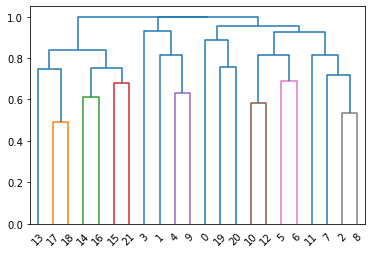

In [29]:
dend_max = model.dendrogram(model.linkage(matrix_df, method='complete', metric = "cosine"), labels=matrix_df.index)

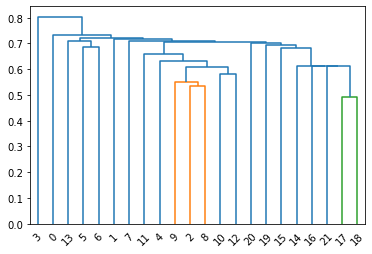

In [30]:
dend_min = model.dendrogram(model.linkage(matrix_df, method='single', metric = "cosine"), labels=matrix_df.index)

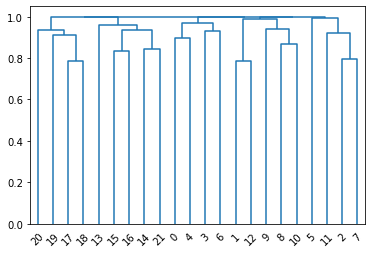

In [31]:
dend_max_tfidf = model.dendrogram(model.linkage(tf_idf, method='complete', metric = "cosine"))

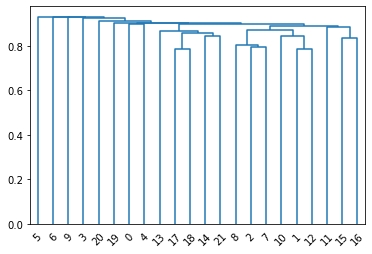

In [32]:
dend_min_tfidf = model.dendrogram(model.linkage(tf_idf, method='single', metric = "cosine"))

By single method is much more complicated because our dendagram is not simetrical and mojorly all of the clusters are less structured.